# Thermophysical properties of water #

Thermophysical properties of water used in MOOSE. 

The density formulation is from *Revised Release on the IAPWS Industrial Formulation 1997 for the Thermodynamic Properties of Water and Steam*.

The viscosity formulation is from *Release on the IAPWS Formulation 2008 for the Viscosity of Ordinary Water Substance*. Note that the enhancement near the critical point has not been included.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Phase diagram ##

<img src=water_phase_diagram.svg width=600>

* The **triple point** is $P_t = 611.657$ Pa, $T_t = 0.01$ C (273.16 K)
* The **critical point** is  $P_c = 22.064$ MPa, $T_c = 373.946$ C (647.096 K)


The IAPWS formulation partitions the phase diagram into several regions, and provides formulations appropriate for each region seperately. 

## Region 1 ##
#### 273.15 K <= T <= 623.15 K, Psat(T) <= P <= 100 MPa ####

In this region, water is in its aqueous form.


###Density###
Density of water as a function of pressure and temperature in region 1.

MOOSE data taken from test suite problems. Comparison with verification data from IAPWS IF97.

In [4]:
moose_data1 = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_region1_density1_vpp_0001.csv')
moose_data2 = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_region1_density2_vpp_0001.csv')
moose_data3 = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_region1_density3_vpp_0001.csv')

In [25]:
md1 = moose_data1.WaterPropertyAuxVariable[0]
md2 = moose_data2.WaterPropertyAuxVariable[0]
md3 = moose_data3.WaterPropertyAuxVariable[0]
iapws1 = 1/(0.00100215168)
iapws2 = 1/(0.001202418)
iapws3 = 1/(0.000971180894)

print "P = 3MPa, T = 300K, MOOSE density = ", md1, ", IAPWS density = ", iapws1, ", % error = ", (md1-iapws1)/iapws1
print "P = 3MPa, T = 500K, MOOSE density = ", md2, ", IAPWS density = ", iapws2, ", % error = ", (md2-iapws2)/iapws2
print "P = 80MPa, T = 300K, MOOSE density = ", md3, ", IAPWS density = ", iapws3, ", % error = ", (md3-iapws3)/iapws3

P = 3MPa, T = 300K, MOOSE density =  997.852940098 , IAPWS density =  997.852939787 , % error =  3.12631217675e-10
P = 3MPa, T = 500K, MOOSE density =  831.657541047 , IAPWS density =  831.657543383 , % error =  -2.8096248579e-09
P = 80MPa, T = 300K, MOOSE density =  1029.67429256 , IAPWS density =  1029.67429258 , % error =  -2.227597775e-11


## Region 2 ##
#### 273.15 K <= T <= 623.15 K, 0 < P <  Psat(T) ####
#### 623.15 K <= T <= 863.15 K, 0 < P <  Psat(T) ####
#### 863.15 K <= T <= 1073.15 K, 0 < P <  100 MPa ####

In this region, water exists as a vapour.

###Density###
Density of water as a function of pressure and temperature in region 2.

MOOSE data taken from test suite problems. Verification data from IAPWS IF97.

In [26]:
moose_data1 = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_region2_density1_vpp_0001.csv')
moose_data2 = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_region2_density2_vpp_0001.csv')
moose_data3 = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_region2_density3_vpp_0001.csv')

In [29]:
md1 = moose_data1.WaterPropertyAuxVariable[0]
md2 = moose_data2.WaterPropertyAuxVariable[0]
md3 = moose_data3.WaterPropertyAuxVariable[0]
iapws1 = 1/(39.4913866)
iapws2 = 1/(92.3015898)
iapws3 = 1/(0.00542946619)

print "P = 0.0035MPa, T = 300K, MOOSE density = ", md1, ", IAPWS density = ", iapws1, ", % error = ", (md1-iapws1)/iapws1
print "P = 0.0035MPa, T = 700K, MOOSE density = ", md2, ", IAPWS density = ", iapws2, ", % error = ", (md2-iapws2)/iapws2
print "P = 30MPa, T = 700K, MOOSE density = ", md3, ", IAPWS density = ", iapws3, ", % error = ", (md3-iapws3)/iapws3

P = 0.0035MPa, T = 300K, MOOSE density =  0.0253219774016 , IAPWS density =  0.0253219774258 , % error =  -9.56240142762e-10
P = 0.0035MPa, T = 700K, MOOSE density =  0.0108340495757 , IAPWS density =  0.0108340495778 , % error =  -1.88751589192e-10
P = 30MPa, T = 700K, MOOSE density =  184.18016876 , IAPWS density =  184.180168916 , % error =  -8.50497502084e-10


## Saturation pressure ##

Saturation pressure equation as a function of temperature - Eq. (30) from *Revised Release on the IAPWS Industrial Formulation 1997 for the Thermodynamic Properties of Water and Steam*. Valid from 273.15 K <= T <= 647.096 K.

In [57]:
moose_data = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_pSat_vpp_0001.csv')

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/), and the verification data from the IAPWS IF97.

In [80]:
colnames = ['Temperature', 'Pressure']
nist_data = pd.read_csv('gold/water_saturation_pressure_nist.csv', header=None, names=colnames)
iapws_data = np.array([[300 - 273.15, 0.353658941*1e-2], [500-273.15, 0.26388976*1e1],[600-273.15, 0.123443146*1e2]])

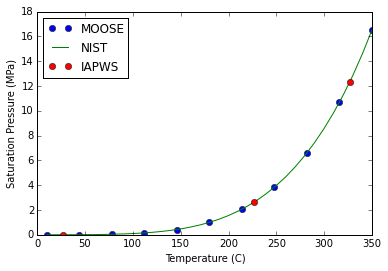

In [87]:
plt.plot(10. + 170. * moose_data.x, moose_data.WaterPropertyAuxVariable/1.e6,'o', label='MOOSE')
plt.plot(nist_data.Temperature, nist_data.Pressure, label='NIST')
plt.plot(iapws_data[:,0], iapws_data[:,1], 'o', label = 'IAPWS')
plt.legend(loc='upper left')
plt.xlabel('Temperature (C)')
plt.ylabel('Saturation Pressure (MPa)')

## Saturation temperature ##

Saturation temperature equation as a function of pressure - Eq. (31) from *Revised Release on the IAPWS Industrial Formulation 1997 for the Thermodynamic Properties of Water and Steam*. Valid for 611.213 Pa <= P << 22.064 MPa.

In [88]:
moose_data = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_tSat_vpp_0001.csv')

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/), and the verification data from the IAPWS IF97.

In [98]:
colnames = ['Temperature', 'Pressure']
nist_data = pd.read_csv('gold/water_saturation_temperature_nist.csv', header=None, names=colnames)
iapws_data = np.array([[0.1, 372.755919-273.15], [1, 453.035632-273.15],[10, 584.149488-273.15]])

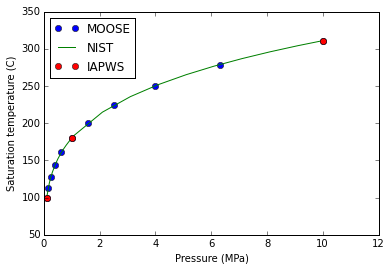

In [99]:
plt.plot((10**moose_data.x/10.), moose_data.WaterPropertyAuxVariable, 'o', label='MOOSE')
plt.plot(nist_data.Pressure, nist_data.Temperature, label='NIST')
plt.plot(iapws_data[:,0], iapws_data[:,1], 'o', label = 'IAPWS')
plt.ylabel('Saturation temperature (C)')
plt.xlabel('Pressure (MPa)')
plt.legend(loc='upper left')

## Viscosity ##

The viscosity of water defined in *Release on the IAPWS Formulation 2008 for the Viscosity of Ordinary Water Substance*. Note that the enhancement near the critical point has not been included.

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [103]:
nist_data = pd.read_csv('gold/water_properties_nist_t50.txt', delimiter='\t', header=None)

In [107]:
moose_data = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_viscosity2_vpp_0001.csv')

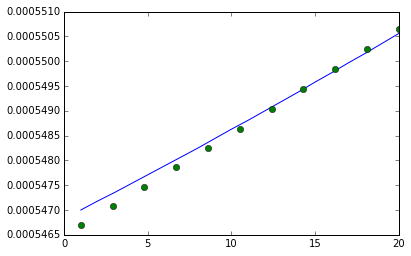

In [108]:
plt.plot(nist_data.icol(1),nist_data.icol(11)/1.e6)
plt.plot((1+9.5 * moose_data.x), moose_data.WaterPropertyAuxVariable,'o', label='MOOSE')

The percentage error between the NIST data and MOOSE data is a maximum at P=1MPa, but is still only 0.05%.

In [111]:
(nist_data.icol(11)[0]/1.e6 - moose_data.WaterPropertyAuxVariable[0])/(nist_data.icol(11)[0]/1.e6)

0.00054392810188279479